In [2]:
import pandas as pd
import numpy as np
from scipy import stats as stats
from scipy import interpolate
import sklearn
from matplotlib import pyplot as plt
import regex
import statsmodels.api as sm
import pickle

In [3]:
df=pd.read_pickle('Final_Train.pkl')
with open('variable_org','rb') as f:
    variable_org=pickle.load(f)
    pass

target=variable_org['target']
dense_factors=variable_org['dense']
sparse_factors=variable_org['sparse']
category_factors=variable_org['categorical']
ordinal_factors=variable_org['ordinal']
other_factors=variable_org['other']

<AxesSubplot:xlabel='long', ylabel='lat'>

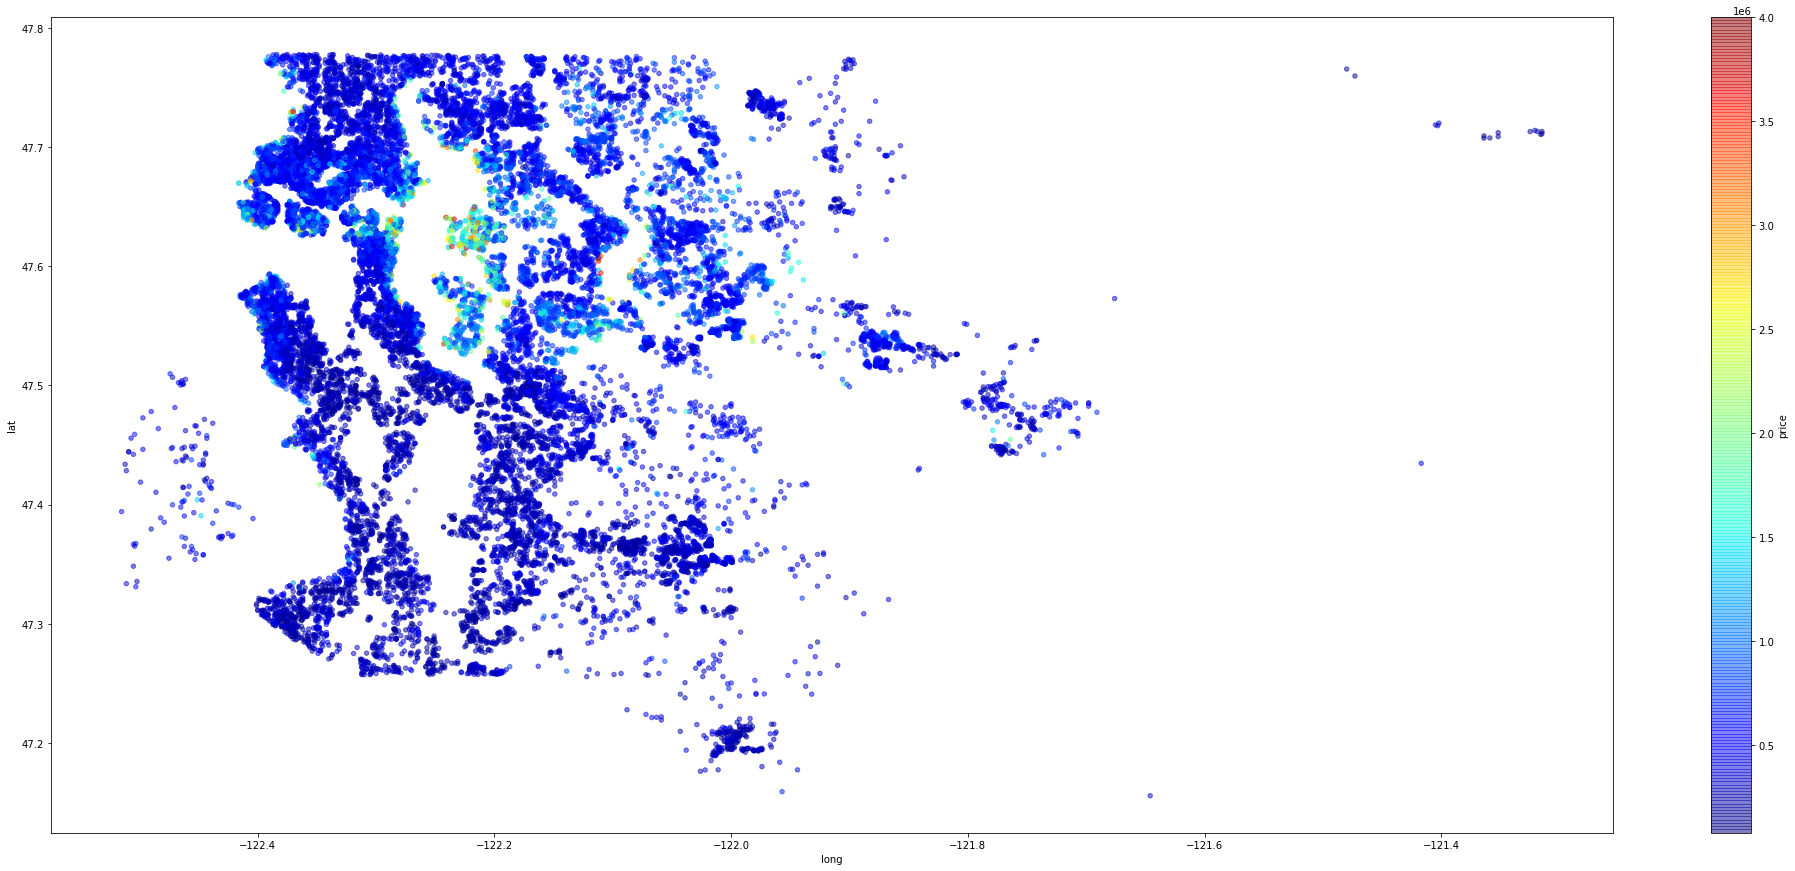

In [6]:
fig,axes=plt.subplots(figsize=(35,15))
df.plot(kind='scatter',x='long',y='lat',alpha=0.5,ax=axes,
        #s=df.sqft_living15,label='Neighboring Space',
        c='price',cmap=plt.get_cmap('jet'),colorbar=True
        )

Variable Exploration

Text(0.5, 1.0, 'Home Sale Prices in KC')

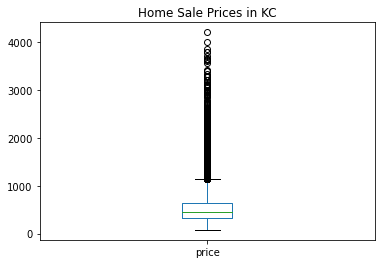

In [5]:
df.price.describe()
ax=df[target].plot.box()
ax.set_title('Home Sale Prices in KC')

In [6]:
df_cont=df[dense_factors]

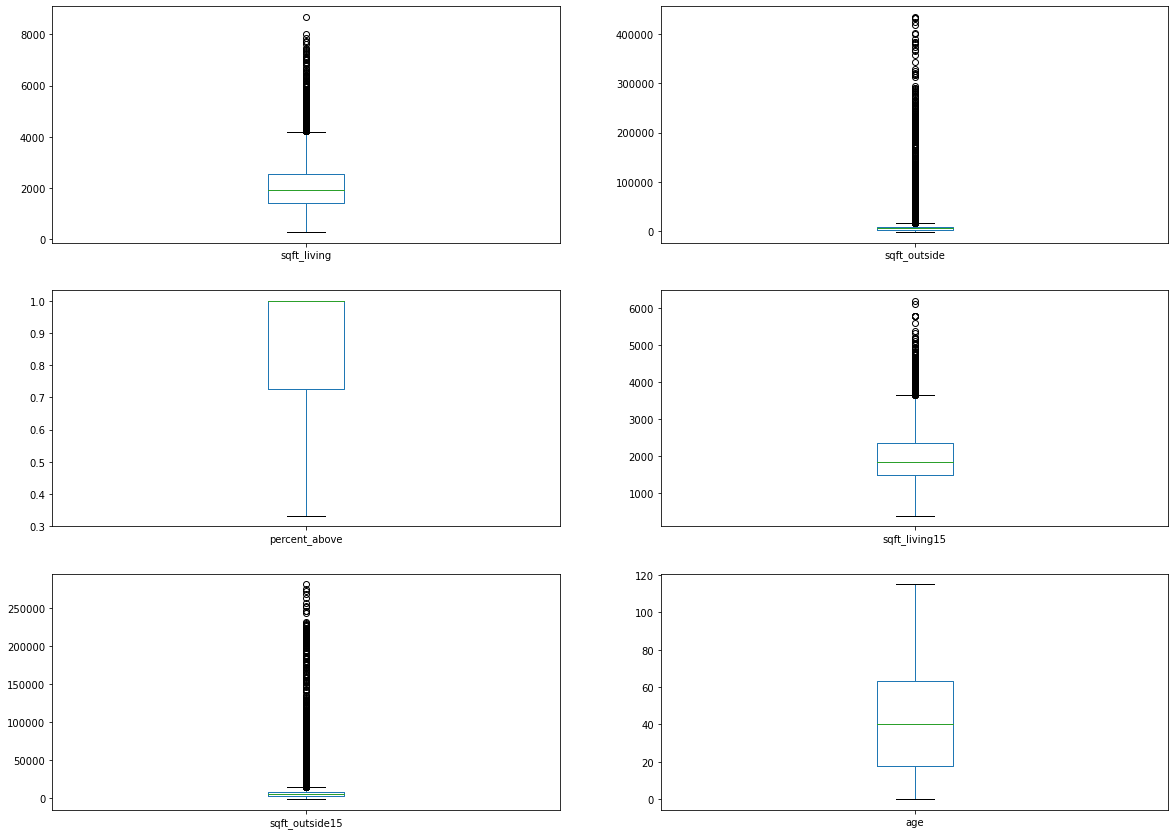

In [7]:
axs1=df_cont.plot(kind='box',subplots=True,figsize=(20,20),layout=(4,2))

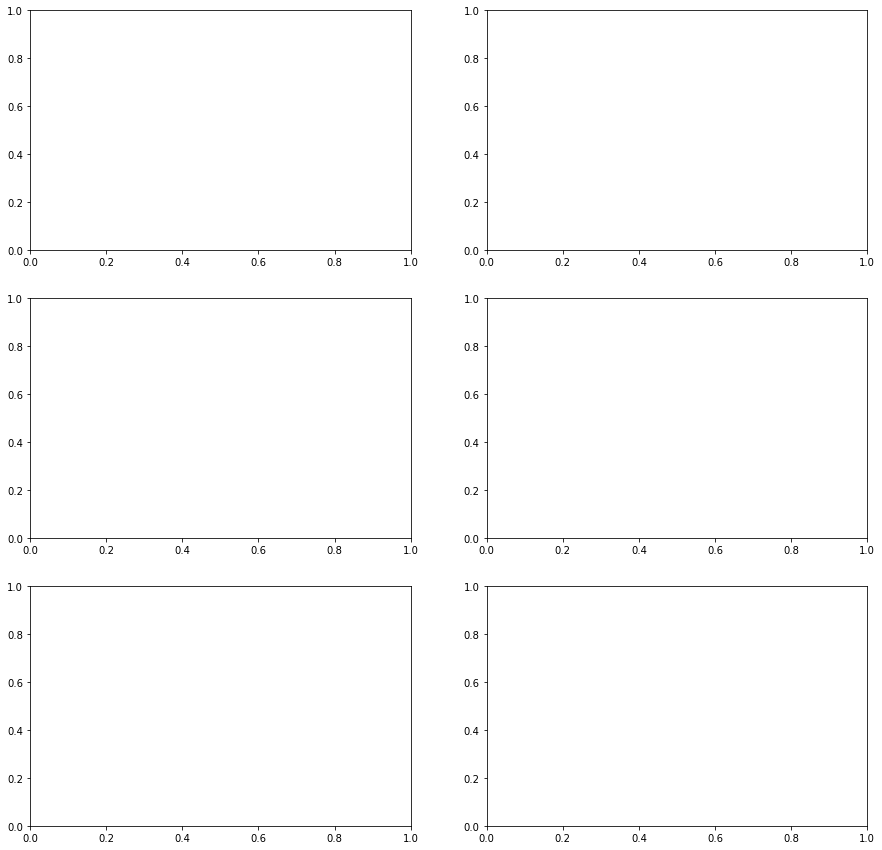

In [18]:
fig,axes=plt.subplots(3,2,figsize=(15,15))

In [19]:
ax_iter=enumerate(fig.axes)
i=0
for c,ax in ax_iter:
    df.plot.scatter(y='price',x=dense_factors[i],ax=ax)
    ax.set_title(dense_factors[i])
    i+=1
    if(i>5):
        break

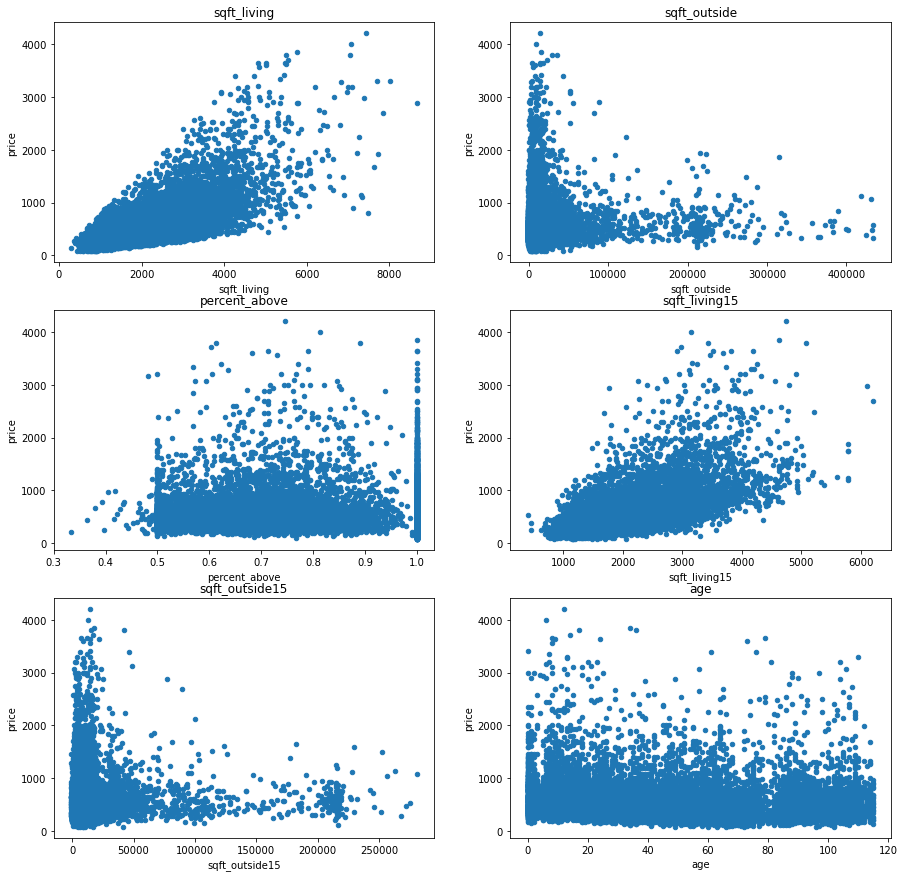

In [20]:
fig

Let's also add a visual that looks at the average price for houses built in each year of our data's range.

In [14]:
avg_price_yr=df.groupby(['yr_built']).price.mean()
avg_price_yr.sort_index()

yr_built
1900    588.646243
1901    555.805680
1902    676.645455
1903    480.985472
1904    599.607056
           ...    
2011    537.078900
2012    525.477532
2013    673.810053
2014    691.102340
2015    760.906034
Name: price, Length: 116, dtype: float64

<AxesSubplot:xlabel='yr_built'>

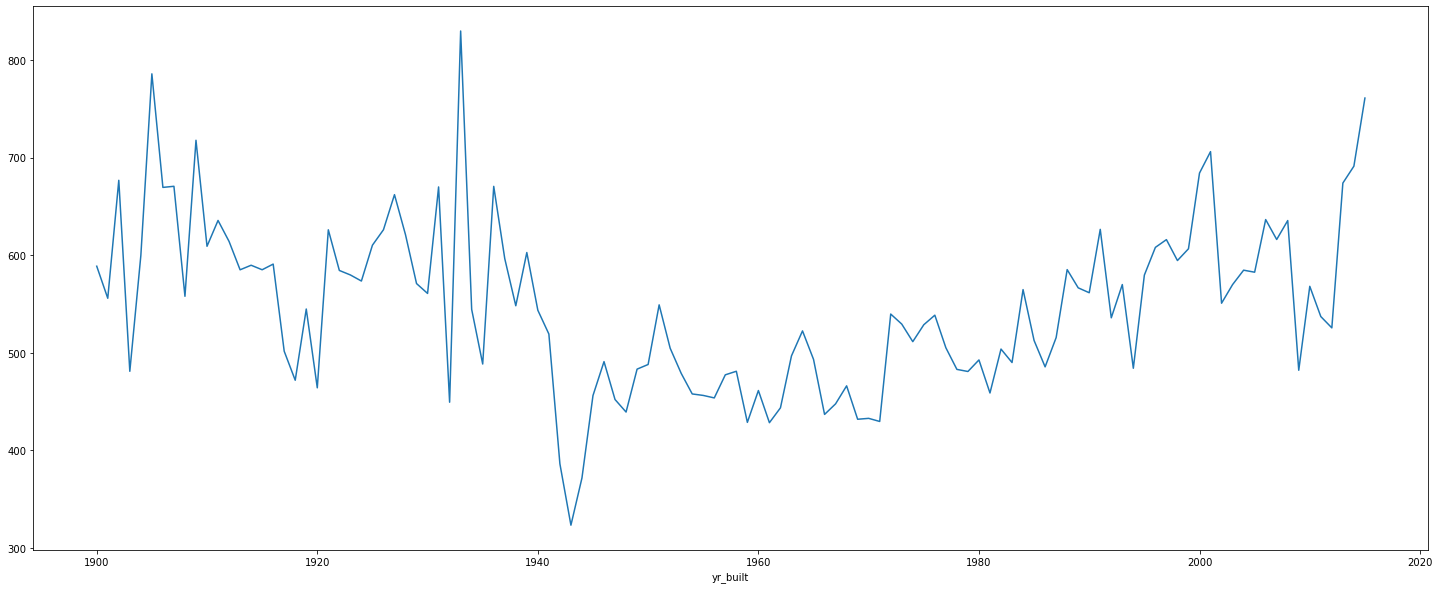

In [15]:
fig,ax=plt.subplots(figsize=(25,10))
avg_price_yr.plot(ax=ax)

In [16]:
T=avg_price_yr.index
X=np.linspace(T.min(),T.max(),10000)
Y=avg_price_yr.values
spl=interpolate.make_interp_spline(T,Y,3)
test=spl(X)

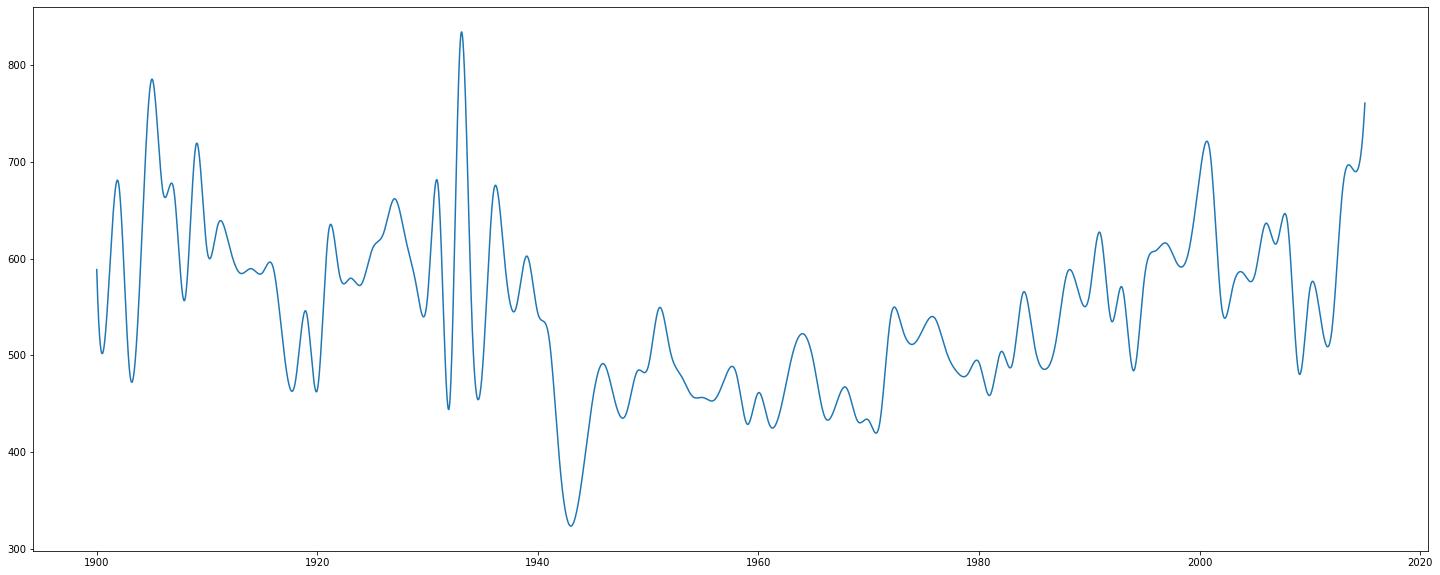

In [17]:
fig,ax=plt.subplots(figsize=(25,10))
ax.plot(X,test)

Next we can visualize our various sparse and categorical factors.

In [18]:
disc_df=df[sparse_factors+category_factors+target]
disc_df

,bedrooms,bathrooms,floors,view,grade,sale_yr,season,waterfront,condition,renovation_status,price
id,,,,,,,,,,,
2591820310,4,2.25,2.0,0,8,2014,Fall,0,4,Never,365.0
7974200820,5,3.00,1.0,0,8,2014,Summer,0,5,Never,865.0
7701450110,4,2.50,2.0,2,11,2014,Summer,0,3,Never,1038.0
9522300010,3,3.50,2.0,2,12,2015,Spring,0,3,Never,1490.0
9510861140,3,2.50,2.0,0,9,2014,Summer,0,3,Never,711.0
...,...,...,...,...,...,...,...,...,...,...,...
627300195,5,2.50,1.0,1,8,2015,Spring,0,3,Never,750.0
8819900270,2,1.75,2.0,0,7,2014,Spring,0,3,Never,440.0
3816300095,3,1.00,1.0,0,7,2014,Spring,0,3,Never,310.0


<AxesSubplot:title={'center':'price'}, xlabel='grade'>

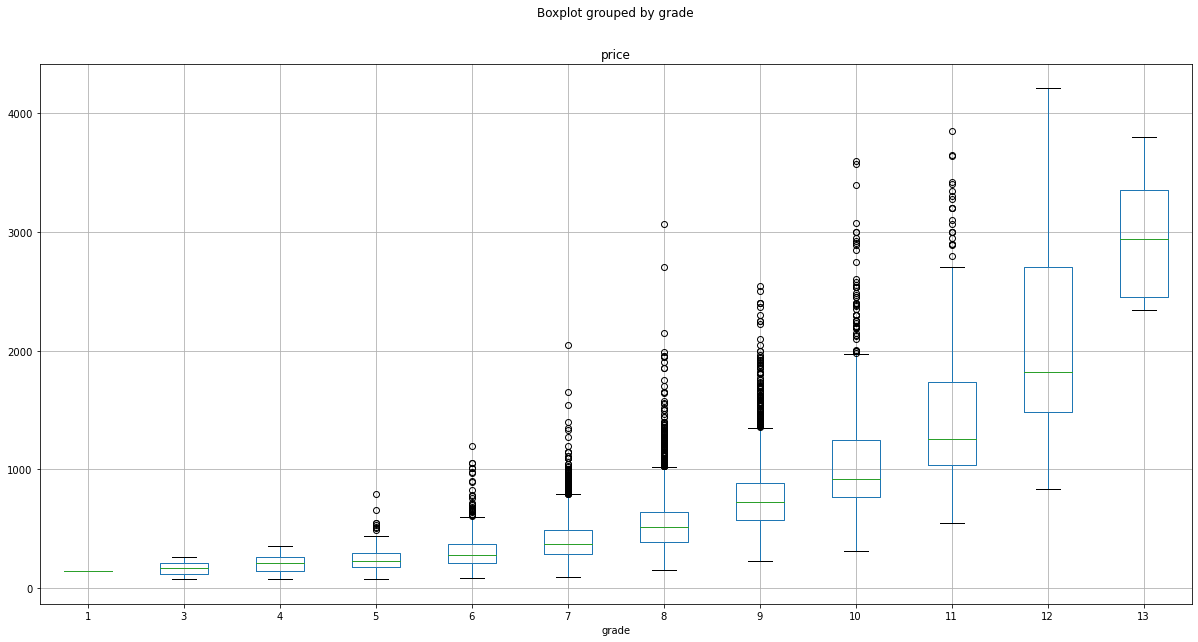

In [20]:
fig,ax=plt.subplots(figsize=(20,10))
df.boxplot(column=['price'],by='grade',ax=ax)

In [21]:
grouped_prices=disc_df.groupby('grade').price
mean_count=grouped_prices.agg(['mean','count'])
mean_count

,mean,count
grade,,
1,142.000000,1
3,168.500000,2
4,210.638636,22
5,243.765878,189
6,302.443769,1645
7,402.420983,7170
8,542.876170,4842
9,774.335254,2093
10,1073.722900,889


<AxesSubplot:title={'center':'Average Prices'}, xlabel='grade'>

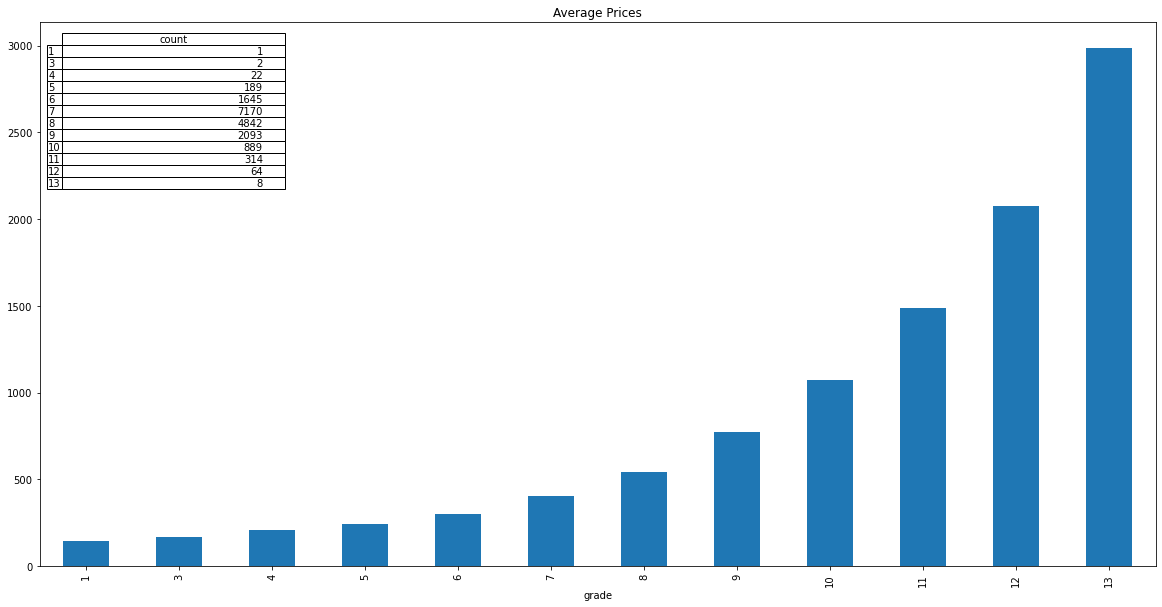

In [23]:
fig,ax=plt.subplots(figsize=(20,10))
ax.set_title('Average Prices')
pd.plotting.table(ax,mean_count[['count']],loc='upper left',colWidths=[0.2,0.2])
mean_count['mean'].plot(kind='bar',ax=ax)